In [2]:
library('tidyverse')
library('patchwork')
library('nycflights13')
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Use filter to make a table with just flights weather data from January.

In [3]:
weather |> head()

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [43]:
jan_weather = weather |> 
    group_by(month) |> 
    filter (month == 1 ) 
jan_weather |> head()

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


Do the same for June.

In [47]:
 june_weather = weather |> 
    group_by(month) |> 
    filter (month == 6)

june_weather |> head()

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,6,1,0,78.08,64.04,62.05,230,6.90468,NA,0,1016.4,10,2013-06-01 00:00:00
EWR,2013,6,1,1,77.00,64.94,66.36,230,8.05546,NA,0,1016.2,10,2013-06-01 01:00:00
EWR,2013,6,1,2,75.92,66.02,71.42,230,6.90468,NA,0,1016.0,10,2013-06-01 02:00:00
EWR,2013,6,1,3,73.94,66.02,76.31,230,5.75390,NA,0,1015.8,10,2013-06-01 03:00:00
EWR,2013,6,1,4,73.04,66.02,78.65,220,5.75390,NA,0,1016.1,10,2013-06-01 04:00:00
EWR,2013,6,1,5,71.96,66.02,81.57,190,5.75390,NA,0,1016.0,10,2013-06-01 05:00:00


Use `filter` and `summarize` to produce two single row tables. One that has the median `temp` for January, and one that has the median `temp` for June.

In [36]:
# E.g.

median_january  = weather |> 
    group_by(month) |>
    filter(month == 1) |> 
    summarize(median.temp = median(temp))

jan_weather |> head()

month,median.temp
<int>,<dbl>
1,37.04


In [35]:
median_june  = weather |> 
    group_by(month) |>
    filter(month == 6) |> 
    summarize(median.temp = median(temp))

median.june |> head()

month,median.temp
<int>,<dbl>
6,71.96


Re-create the following figure.

<img src="./example.png" style="width: 800px;" />

- Use `geom_hline` for the median line.
- Use `scale_color_viridis_c` to set the color scale.
- This chart can be made by facetting or each plot can be created by itself and combined with `patchwork`. For this example use `patchwork`.
- Use `ylim` to make the y-axis for each plot the same. 

In [17]:
library ('patchwork')

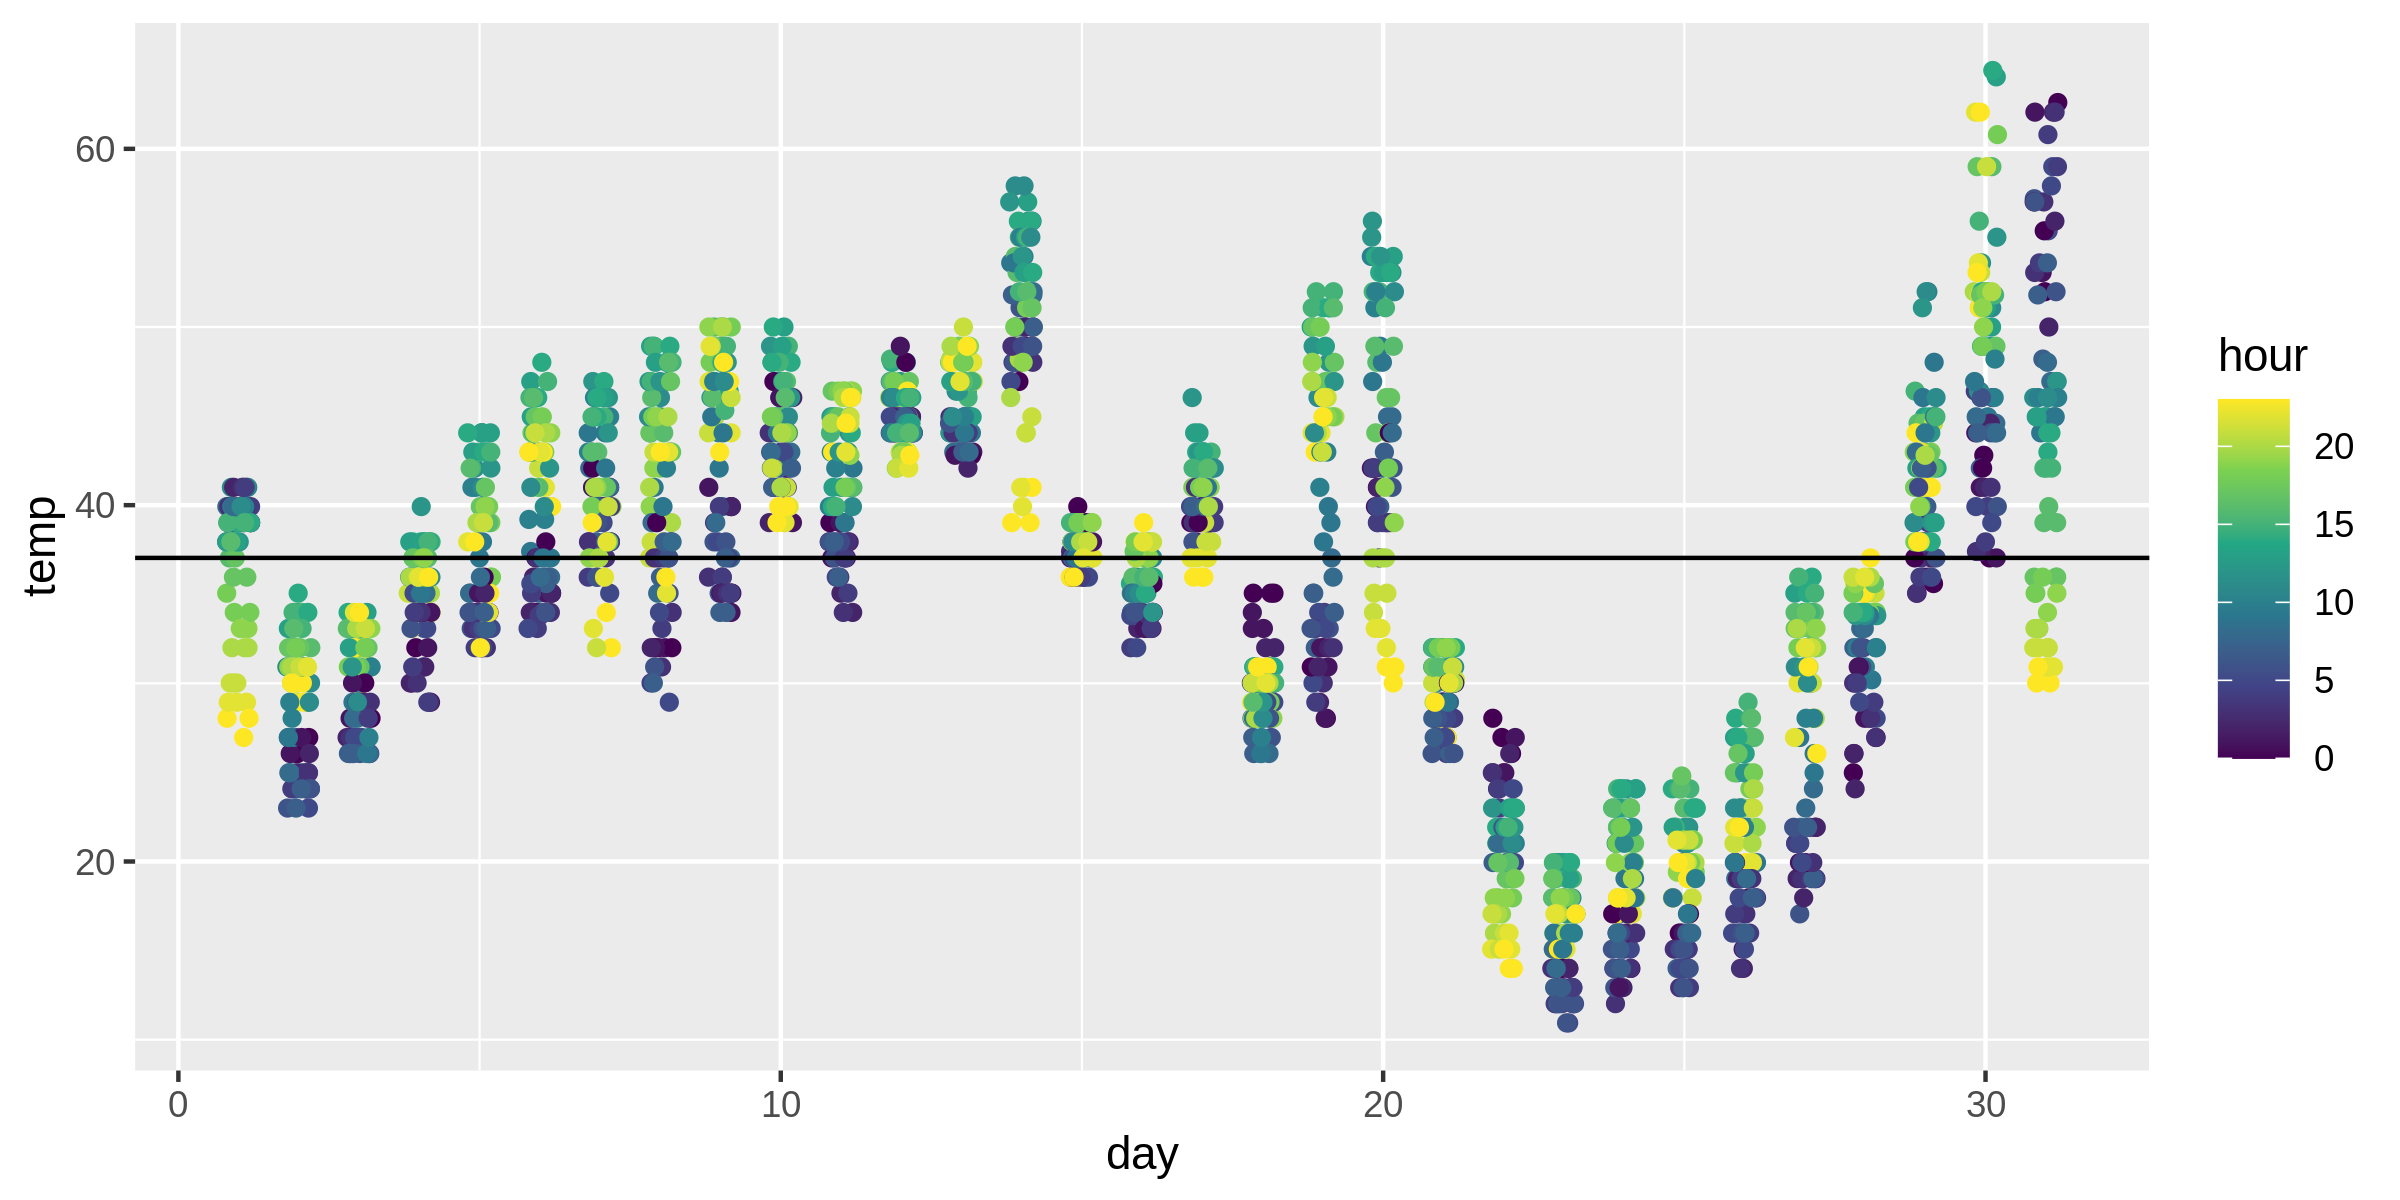

In [46]:
p = ggplot(jan_weather, aes(x = day, y = temp, color = hour)) + 
    geom_point(na.rm = TRUE,position = position_jitter(h = 0, w = 0.2)) + 
    scale_color_viridis_c() +
    geom_hline (data = median_january,mapping = aes(yintercept = 37.04))
p

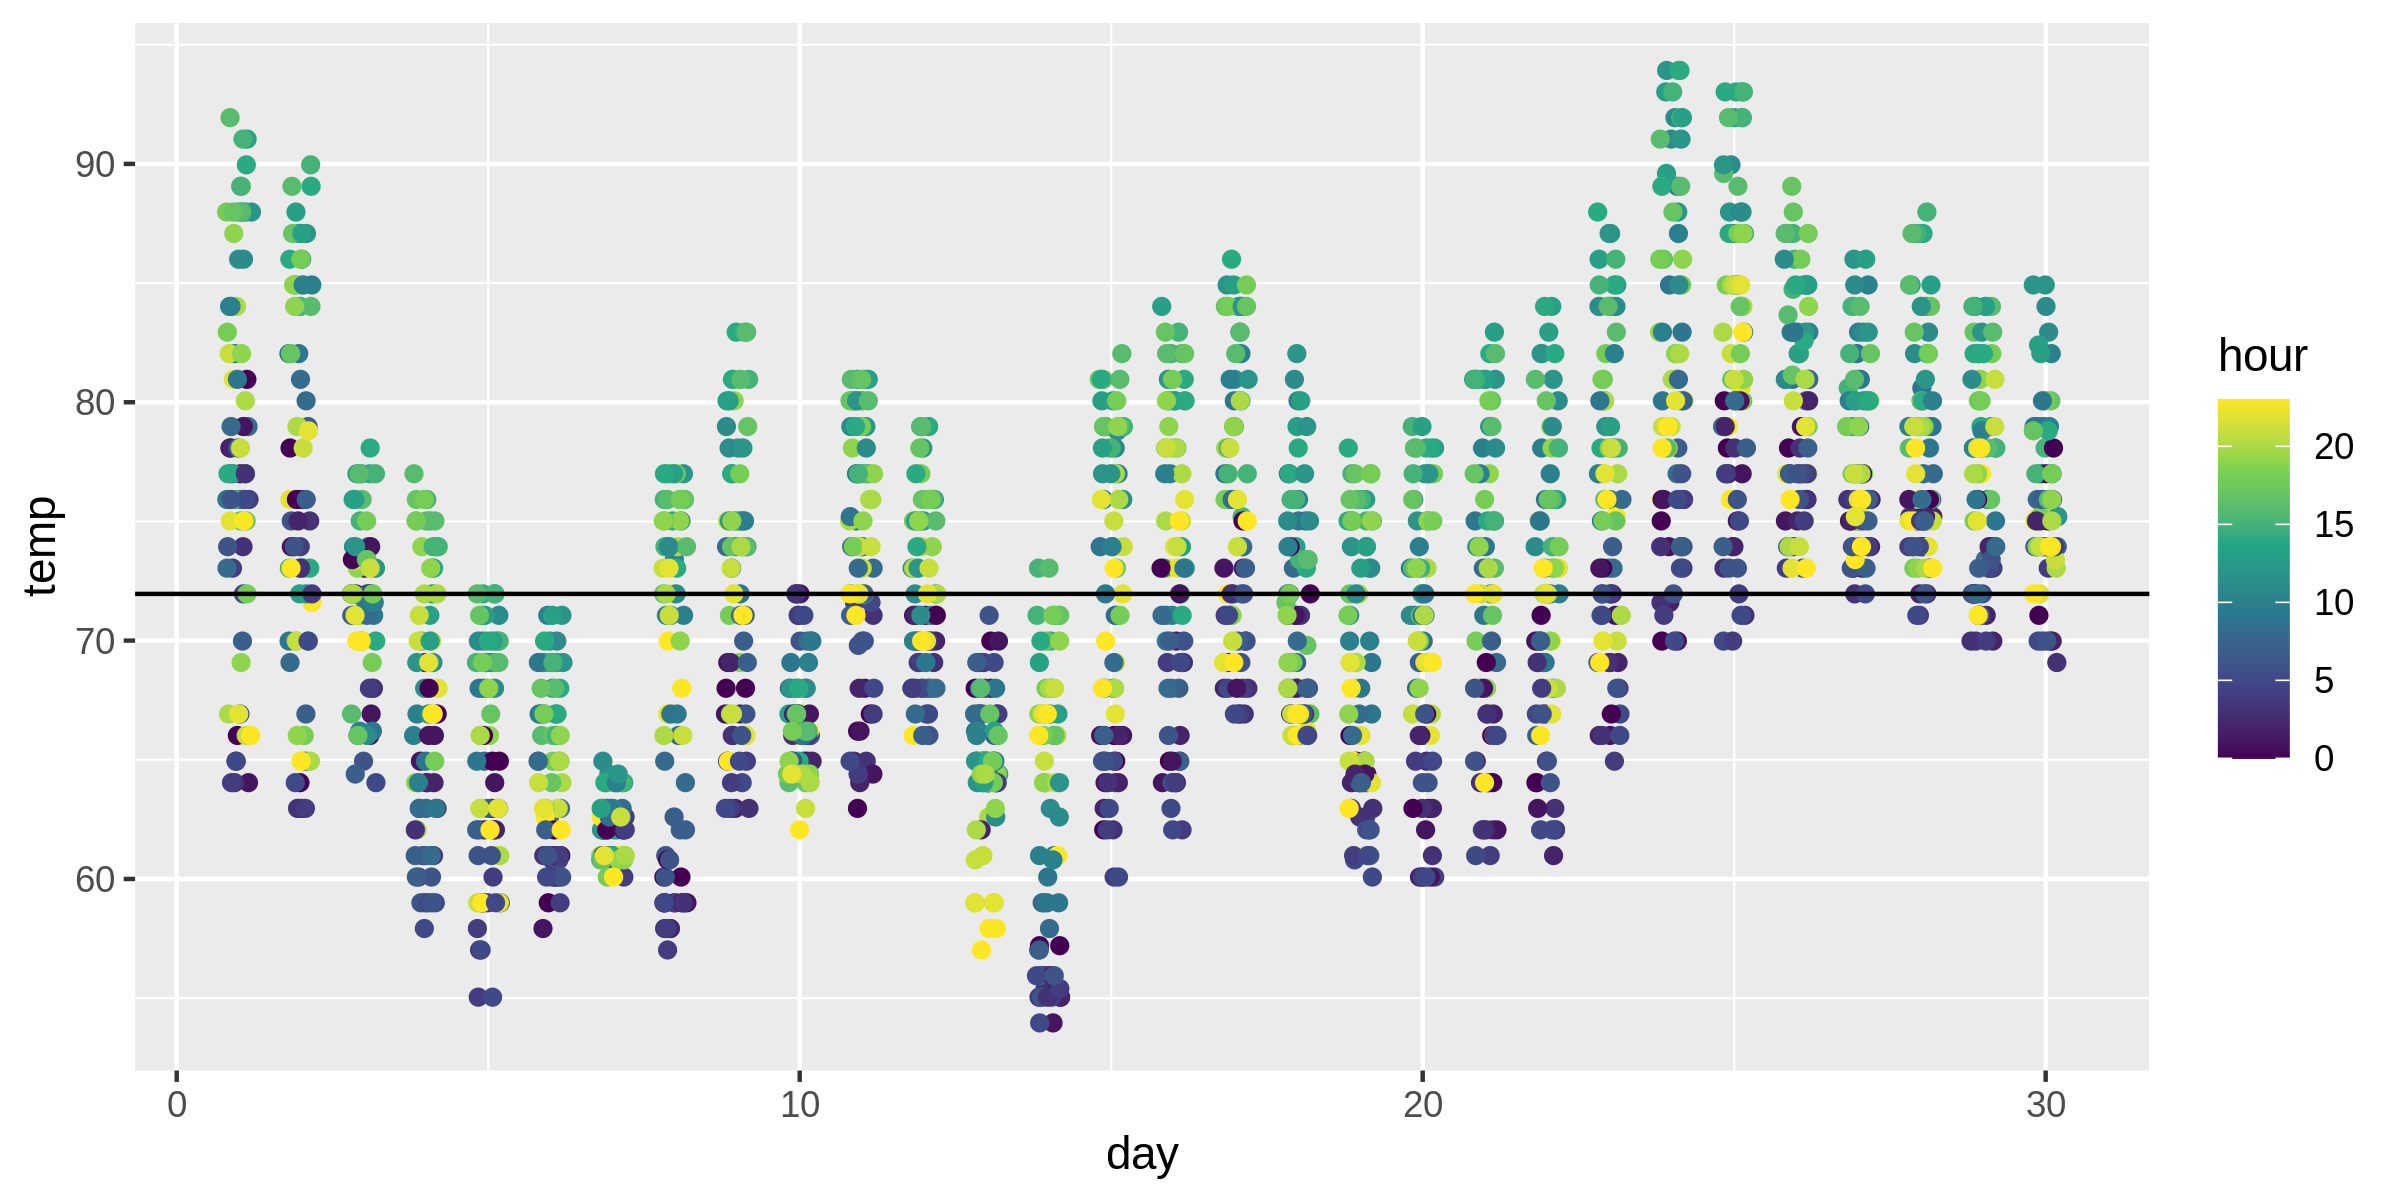

In [49]:
p1 = ggplot(june_weather, aes(x = day, y = temp, color = hour)) + 
    geom_point(na.rm = TRUE,position = position_jitter(h = 0, w = 0.2)) + 
    scale_color_viridis_c() +
    geom_hline (data = median_june,mapping = aes(yintercept = 71.96))
p1